In [33]:
# !pip install streamlit
# !pip install NeuralProphet

import pandas as pd
import sys
import streamlit as st
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import time
import math
from sklearn.model_selection import train_test_split
from neuralprophet import NeuralProphet
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, normalize
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Number of Numerical Features: 19
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


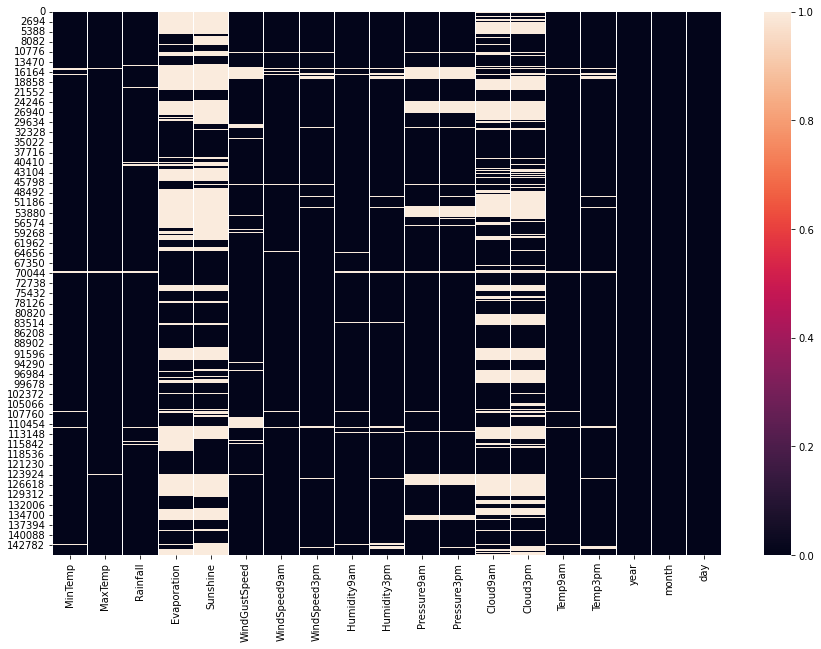

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))

  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))

2022-08-21 09:40:05.122 WARNING py.warnings: /usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))



             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning

  FutureWarning

2022-08-21 09:40:05.261 WARNING py.warnings: /usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other argu

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}
{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}
{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}
{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide

<Figure size 1080x720 with 0 Axes>

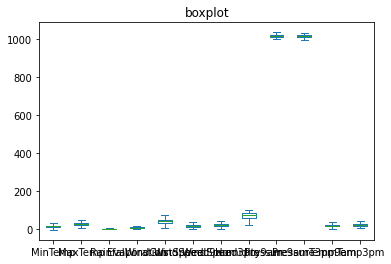

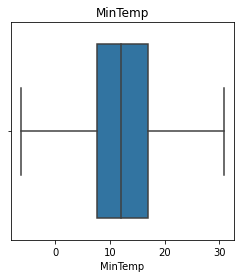

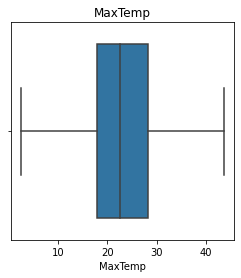

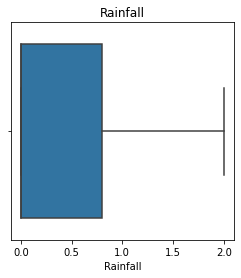

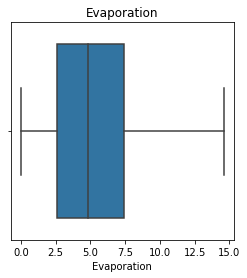

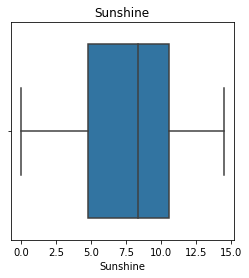

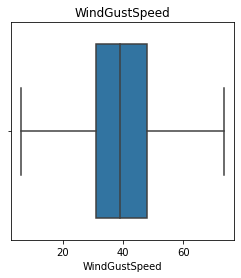

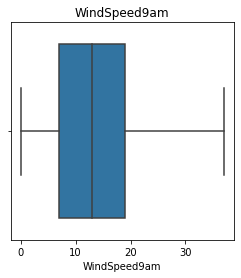

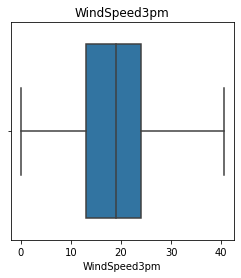

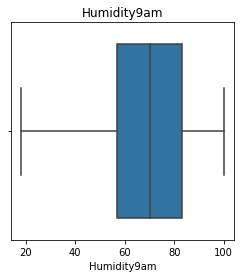

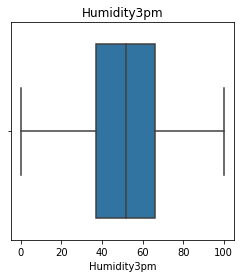

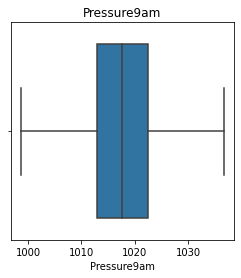

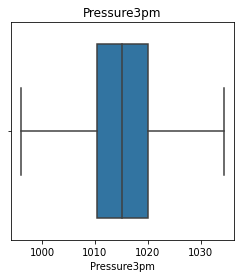

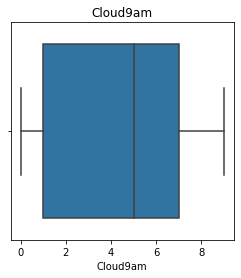

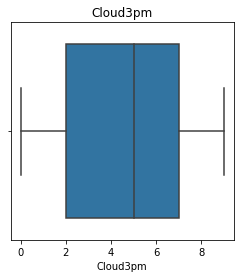

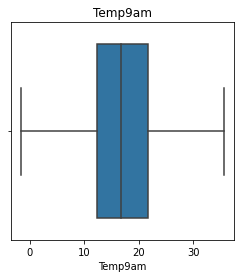

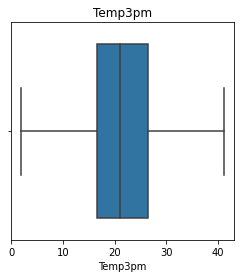

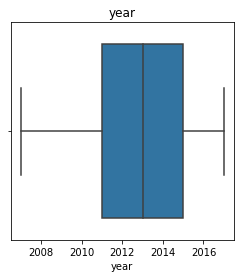

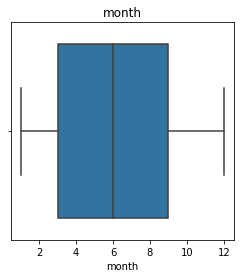

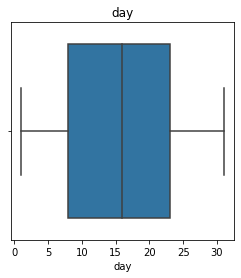

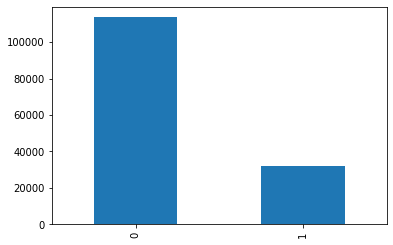

In [26]:
df = pd.read_csv('./weatherAUS.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype    
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop('Date', axis = 1, inplace = True)


categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)
print(df[categorical_features].isnull().sum())

categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]

for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)
df[categorical_features].isnull().sum()

df[numerical_features].isnull().sum()
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_features].isnull(),linecolor='white')
# visualizing the Null values in Numerical Features:

# df[numerical_features].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')
# checking for outliers using Box Plot:


# Display the plot
plt.show()
# checking for outliers using the statistical formulas:

print(df[numerical_features].describe())


features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit
  
plt.figure(figsize=(15,10))
ax = df[features_with_outliers].plot(kind='box', title='boxplot')
for feature in numerical_features:

    plt.figure(figsize=(4,4))
    sns.boxplot(df[feature])
    plt.title(feature)

# list of numerical Features with Null values:

numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
# Filling null values uisng mean: 

for feature in numerical_features_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)
df.isnull().sum()
df.head()
# dfboxplot = pd.DataFrame()
# for feature in numerical_features:
#     dfboxplot.append(normalize(df[numerical_features]))
# plt.figure(figsize=(15,10))
# ax = dfboxplot.plot(kind='box', title='boxplot')
df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)


df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)
plt.figure()
df['RainTomorrow'].value_counts().plot(kind='bar')
# 
def encode_data(feature_name):
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)
df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)
df['Location'].replace(encode_data('Location'), inplace = True)


data = df
# dataout = 'data_'+ type  +  '.pkl' if not useGeo else 'score_'+ type + '_geo.pkl'
# with open(dataout, "wb") as f:
#     pickle.dump(data, f)

In [4]:
sns.pairplot(df, hue='RainTomorrow')
#plt.show()

In [29]:
target = 'RainTomorrow'
y = df[target]
X = df.drop([target],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y.value_counts(normalize=True)


logreg


0    0.780854
1    0.219146
Name: RainTomorrow, dtype: float64

0.8437714835693662
0.8444933315000688
[[21536  1190]
 [ 3334  3032]]


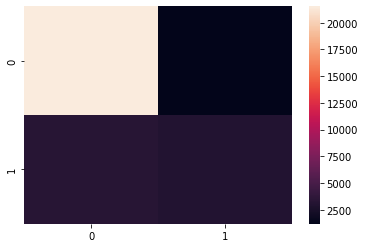

In [16]:
classifier = LogisticRegression(solver='liblinear', random_state=0)
classifier.fit(X_train, y_train)
end_time = time.time()
y_pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
classifier_score_train = classifier.score(X_train, y_train)
classifier_score_test = classifier.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(classifier_score_train)
print(classifier_score_test)
print(cm)
sns.heatmap(cm)

In [20]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.95      0.48      0.90      0.67      0.47     22726
          1       0.72      0.48      0.95      0.57      0.67      0.43      6366

avg / total       0.83      0.84      0.58      0.83      0.67      0.46     29092



Le tableau précédent montre que le rappel et le f1-score de la classe 1 sont mauvais, tandis que pour la classe 0, ils sont élevés.
En outre, la moyenne géométrique est également faible. Le modèle n'est donc pas acceptable ainsi pour notre problème.

In [35]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts()))

smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm).value_counts()))

Classes échantillon oversampled : {1: 90857, 0: 90857}
Classes échantillon SMOTE : {1: 90857, 0: 90857}


In [26]:

svm = SVC(gamma='scale')
svm.fit(X_ro, y_ro)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))

print(classification_report_imbalanced(y_test, y_pred))

col_0             0     1
RainTomorrow             
0             18619  4107
1              1439  4927
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.82      0.77      0.87      0.80      0.64     22726
          1       0.55      0.77      0.82      0.64      0.80      0.63      6366

avg / total       0.84      0.81      0.78      0.82      0.80      0.64     29092



In [27]:
svm = SVC(gamma='scale')
svm.fit(X_sm, y_sm)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0             0     1
RainTomorrow             
0             18777  3949
1              1568  4798
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.83      0.75      0.87      0.79      0.63     22726
          1       0.55      0.75      0.83      0.63      0.79      0.62      6366

avg / total       0.84      0.81      0.77      0.82      0.79      0.63     29092



0.7869431458820294
0.7881204454832944
[[18113  4613]
 [ 1551  4815]]


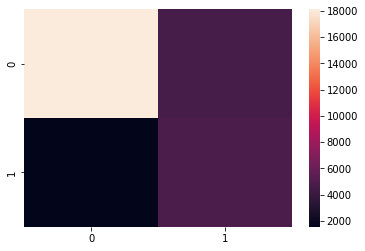

In [28]:
classifier = LogisticRegression(solver='liblinear', random_state=0)
classifier.fit(X_sm, y_sm)
end_time = time.time()
# modelout = 'score_'+ m + '.pkl' if not useGeo else 'score_'+ m + '_geo.pkl'
# with open(modelout, 'wb') as file:
#     pickle.dump(classifier, file)
y_pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
classifier_score_train = classifier.score(X_train, y_train)
classifier_score_test = classifier.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(classifier_score_train)
print(classifier_score_test)
print(cm)
sns.heatmap(cm)

In [30]:
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)
print('Classes échantillon undersampled :', dict(pd.Series(y_ru).value_counts()))

#Centroids
# cc = ClusterCentroids()
# X_cc, y_cc = cc.fit_resample(X_train, y_train)
# print('Classes échantillon CC :', dict(pd.Series(y_cc).value_counts()))

Classes échantillon undersampled : {0: 25511, 1: 25511}


In [30]:
svm = SVC(gamma='scale')
svm.fit(X_ru, y_ru)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0             0     1
RainTomorrow             
0             18355  4371
1              1387  4979
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.81      0.78      0.86      0.79      0.63     22726
          1       0.53      0.78      0.81      0.63      0.79      0.63      6366

avg / total       0.84      0.80      0.79      0.81      0.79      0.63     29092



In [31]:
svm = SVC(gamma='scale')
svm.fit(X_cc, y_cc)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0             0     1
RainTomorrow             
0             18099  4627
1              1395  4971
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.80      0.78      0.86      0.79      0.62     22726
          1       0.52      0.78      0.80      0.62      0.79      0.62      6366

avg / total       0.84      0.79      0.78      0.81      0.79      0.62     29092



0.7870806407259727
0.788636051148082
[[18264  4462]
 [ 1687  4679]]


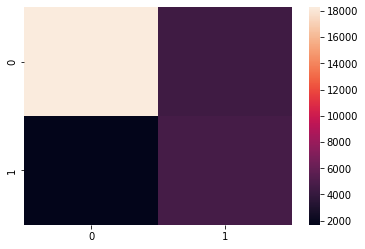

In [32]:
classifier = LogisticRegression(solver='liblinear', random_state=0)
classifier.fit(X_cc, y_cc)
end_time = time.time()
# modelout = 'score_'+ m + '.pkl' if not useGeo else 'score_'+ m + '_geo.pkl'
# with open(modelout, 'wb') as file:
#     pickle.dump(classifier, file)
y_pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
classifier_score_train = classifier.score(X_train, y_train)
classifier_score_test = classifier.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(classifier_score_train)
print(classifier_score_test)
print(cm)
sns.heatmap(cm)

0.8886979238278565
0.8038979788257941
[[18385  4341]
 [ 1364  5002]]


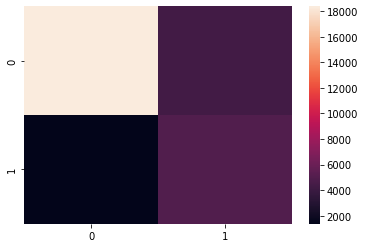

In [31]:
classifier = RandomForestClassifier()
classifier.fit(X_ru, y_ru)
end_time = time.time()
y_pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
classifier_score_train = classifier.score(X_train, y_train)
classifier_score_test = classifier.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(classifier_score_train)
print(classifier_score_test)
print(cm)
sns.heatmap(cm)

0.8227347724460333
0.8238347311975801
[[19668  3058]
 [ 2067  4299]]


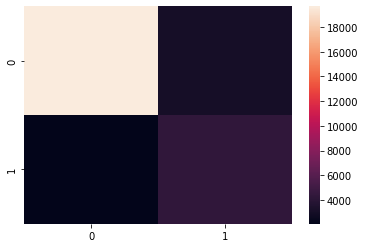

In [36]:
classifier = GradientBoostingClassifier()
classifier.fit(X_sm, y_sm)
end_time = time.time()

y_pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
classifier_score_train = classifier.score(X_train, y_train)
classifier_score_test = classifier.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(classifier_score_train)
print(classifier_score_test)
print(cm)
sns.heatmap(cm)

0.7956139144782071
0.7947201979925753
[[18224  4502]
 [ 1470  4896]]


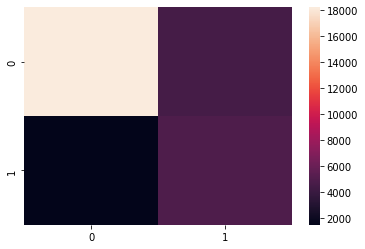

In [38]:
classifier = GradientBoostingClassifier()
classifier.fit(X_ro, y_ro)
end_time = time.time()

y_pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
classifier_score_train = classifier.score(X_train, y_train)
classifier_score_test = classifier.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(classifier_score_train)
print(classifier_score_test)
print(cm)
sns.heatmap(cm)

In [37]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.87      0.68      0.88      0.76      0.60     22726
          1       0.58      0.68      0.87      0.63      0.76      0.57      6366

avg / total       0.83      0.82      0.72      0.83      0.76      0.59     29092



TIME SERIES


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.7% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.7% of the data.
2022-08-21 11:31:32.806 INFO    NP.df_utils: Major frequency D corresponds to 99.7% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
2022-08-21 11:31:32.815 INFO    NP.df_utils: Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
2022-08-21 11:31:32.821 INFO    NP.config: Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling dai

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
(3337, 2)


INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
2022-08-21 11:31:33.015 INFO    NP.config: Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 137
INFO:NP.config:Auto-set epochs to 137
2022-08-21 11:31:33.019 INFO    NP.config: Auto-set epochs to 137


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.02E-01, min: 9.51E-02
INFO:NP.utils_torch:lr-range-test results: steep: 5.02E-01, min: 9.51E-02
2022-08-21 11:31:33.914 INFO    NP.utils_torch: lr-range-test results: steep: 5.02E-01, min: 9.51E-02


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.84E-01, min: 1.11E-01
INFO:NP.utils_torch:lr-range-test results: steep: 5.84E-01, min: 1.11E-01
2022-08-21 11:31:34.448 INFO    NP.utils_torch: lr-range-test results: steep: 5.84E-01, min: 1.11E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.08E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 3.08E-01
2022-08-21 11:31:34.456 INFO    NP.forecaster: lr-range-test selected learning rate: 3.08E-01
Epoch[137/137]: 100%|██████████| 137/137 [00:33<00:00,  4.07it/s, SmoothL1Loss=0.0797, MAE=4.42, RMSE=8.56, RegLoss=0]


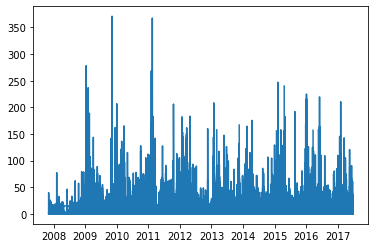

In [41]:
df = pd.read_csv('./weatherAUS.csv')


df.Location.unique()
df.columns
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Rainfall'])
df['Year'] = df['Date'].apply(lambda x: x.year)
data = df


df['Date'].dtype    
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


print(df.Location.unique())
df.columns
d=df
d = data[data['Location'] == 'Sydney']
# d = d[d['Year']<=2013]
d = d[['Date', 'Rainfall']]
d.dropna(inplace=True)
# data = data.drop_duplicates()

d.columns = ['ds', 'y'] 
print(d.shape)

mod = NeuralProphet()
model = mod.fit(d, freq='D')#, epochs=1000)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.7% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.7% of the data.
2022-08-21 07:16:12.567 INFO    NP.df_utils: Major frequency D corresponds to 99.7% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
2022-08-21 07:16:12.578 INFO    NP.df_utils: Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.819% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.819% of the data.
2022-08-21 07:16:12.614 INFO    NP.df_utils: Major frequency D corresponds to 99.819% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
2022-08-21 07:16:12.624 INFO    NP.df_utils: Defined frequency is equ

Text(60.0, 0.5, 'Close Stock Price')

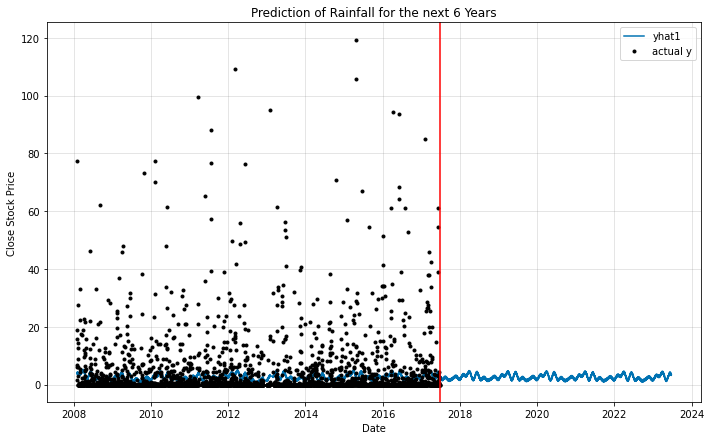

In [101]:
future = mod.make_future_dataframe(d, periods=6*365, n_historic_predictions=True)
            
prediction = mod.predict(future)
forecast = mod.plot(prediction)
  # plt.plot(df_test['ds'], df_test['y'], color='purple')
plt.title("Prediction of Rainfall for the next 6 Years")
plt.xlabel("Date")
plt.axvline(x=d['ds'].iloc[-1], color='r')

plt.ylabel("Close Stock Price")


In [40]:
df.columns
d=df
d = data[data['Location'] == 'Sydney']
# d = d[d['Year']<=2013]
d = d[['Date', 'MaxTemp']]
d.dropna(inplace=True)
# data = data.drop_duplicates()

d.columns = ['ds', 'y'] 
print(d.shape)

mod = NeuralProphet()
model = mod.fit(d, freq='D')#, epochs=1000)

KeyError: ignored

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.85% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.85% of the data.
2022-08-21 07:19:04.571 INFO    NP.df_utils: Major frequency D corresponds to 99.85% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
2022-08-21 07:19:04.583 INFO    NP.df_utils: Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.91% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.91% of the data.
2022-08-21 07:19:04.617 INFO    NP.df_utils: Major frequency D corresponds to 99.91% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
2022-08-21 07:19:04.629 INFO    NP.df_utils: Defined frequency is equ

Text(66.25, 0.5, 'Close Stock Price')

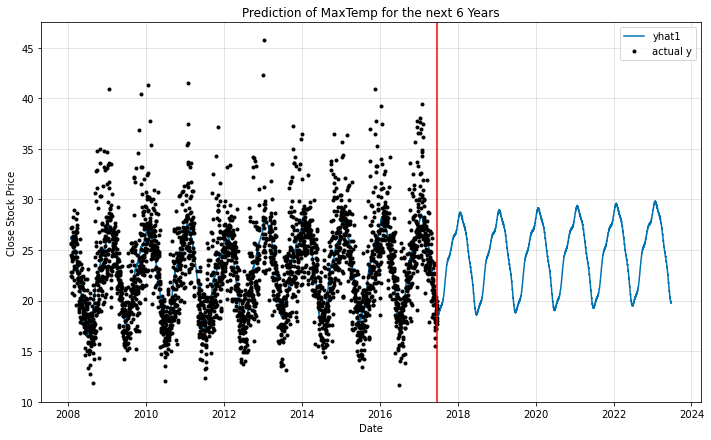

In [106]:
future = mod.make_future_dataframe(d, periods=6*365, n_historic_predictions=True)
            
prediction = mod.predict(future)
forecast = mod.plot(prediction)
  # plt.plot(df_test['ds'], df_test['y'], color='purple')
plt.title("Prediction of MaxTemp for the next 6 Years")
plt.xlabel("Date")
plt.axvline(x=d['ds'].iloc[-1], color='r')

plt.ylabel("Close Stock Price")

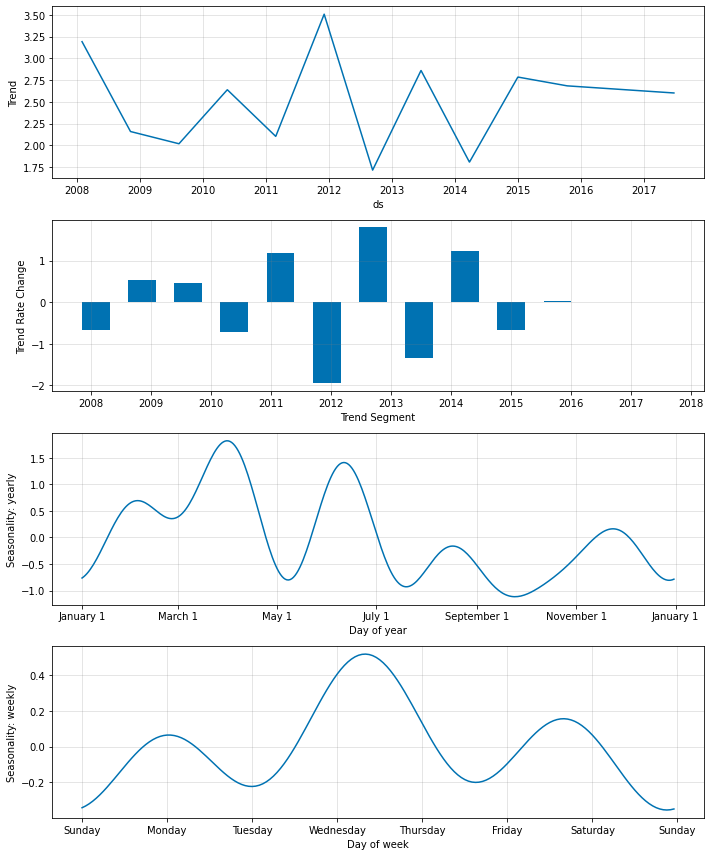

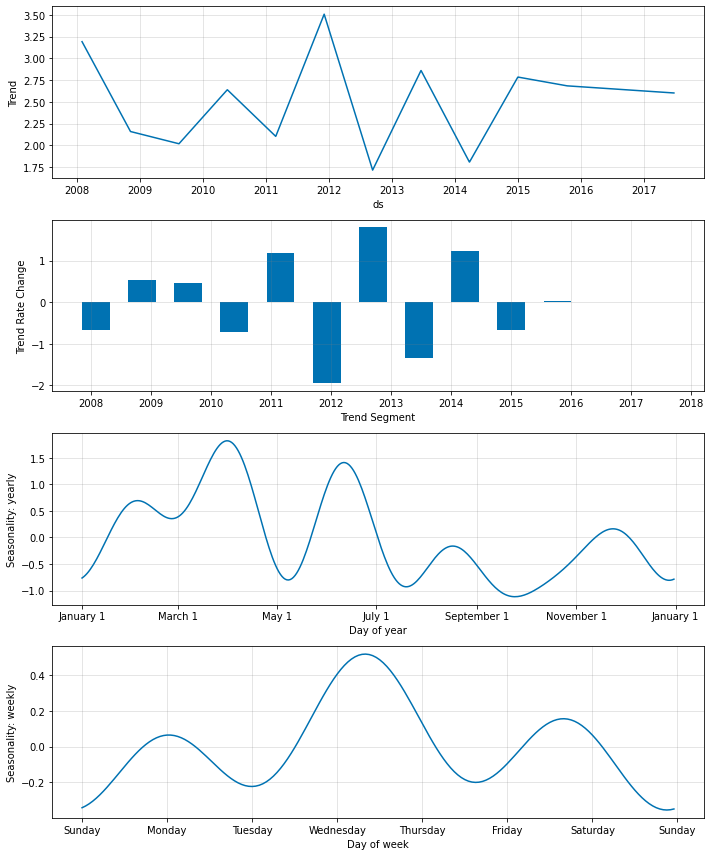

In [42]:
mod.plot_parameters()

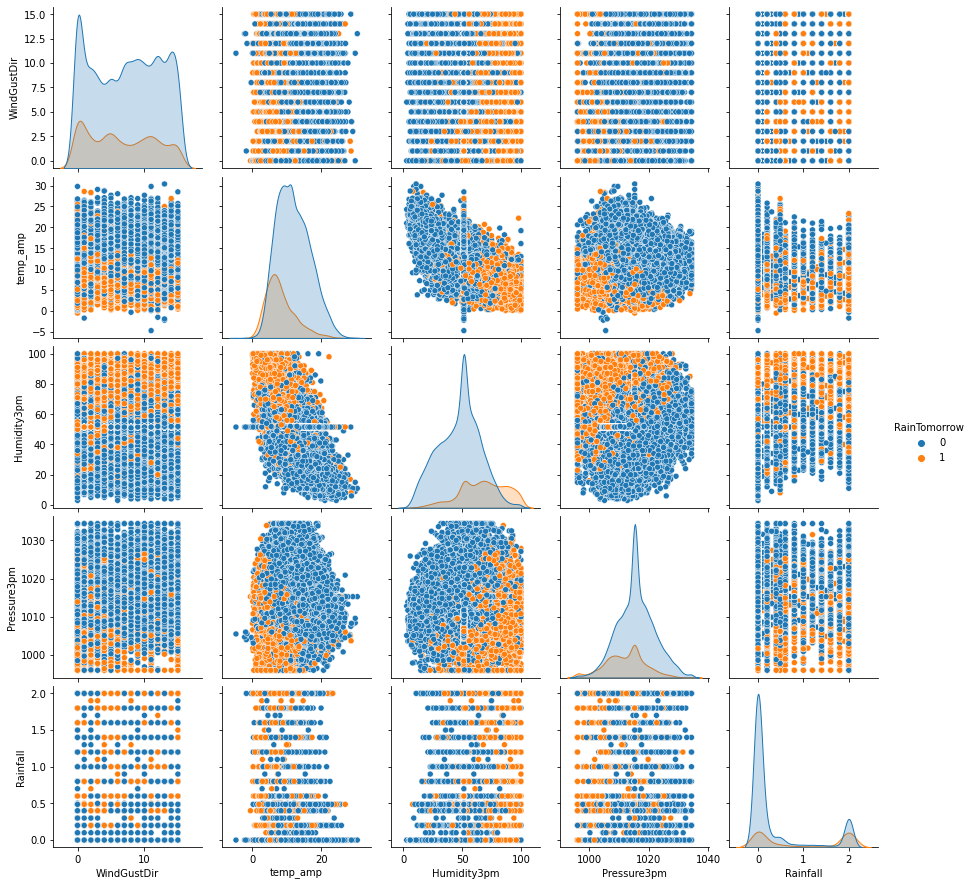

In [33]:
X_cc = df
X_cc['temp_amp'] = X_cc['MaxTemp'] - X_cc['MinTemp']
X_cc = X_cc[X_cc['year']>=2016]
X_cc = X_cc[['WindGustDir', 'temp_amp', 'Humidity3pm', 'Pressure3pm', 'RainTomorrow', 'Rainfall']]

y = X_cc['RainTomorrow']
X = X_cc
sns.pairplot(X_cc, hue='RainTomorrow')

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
# cc = ClusterCentroids()
# X_train.columns
# X_cc, y_cc = cc.fit_resample(X_train, y_train)
# print('Classes échantillon CC :', dict(pd.Series(y_cc).value_counts()))

Classes échantillon CC : {0: 1426, 1: 1426}


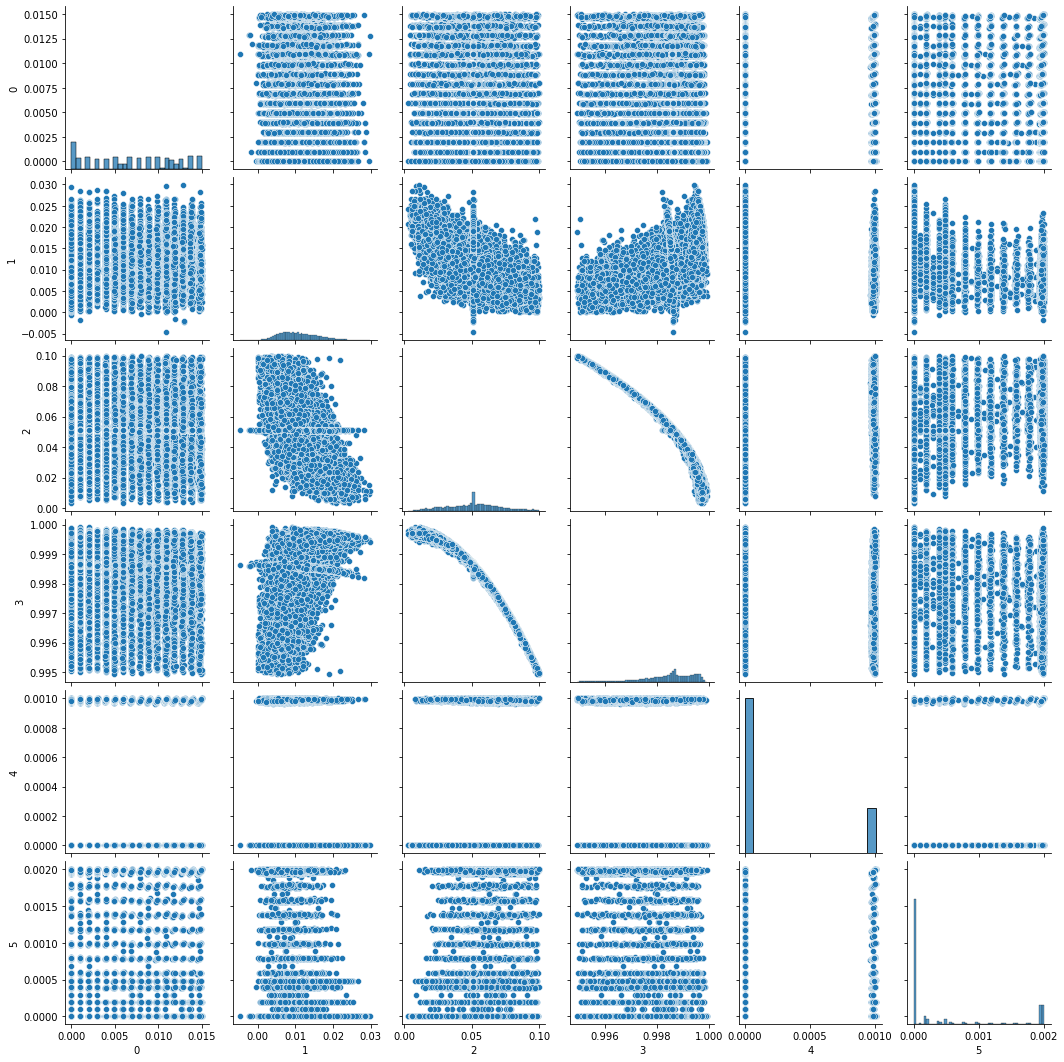

In [35]:
# X_cc['temp_amp'] = X_cc['MaxTemp'] - X_cc['MinTemp']
# X_cc = X_cc[['Location', 'WindGustDir', 'temp_amp', 'Humidity3pm', 'Pressure3pm', 'month']]
X_cc = normalize(X_cc, norm='l2', axis=1, copy=True, return_norm=False)
sns.pairplot(pd.DataFrame(X_cc))

In [87]:
dfts = df[df['Location'] == 'Sydney'][['Date','MaxTemp']]
dfts['Date'] = pd.to_datetime(dfts['Date'])
dfts['Date'].describe()
dfts.set_index('Date', inplace=True)
dfts.columns
dfts.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until

  This is separate from the ipykernel package so we can avoid doing imports until

2022-08-21 07:04:52.263 WARNING py.warnings: /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until



,MaxTemp
Date,
2008-02-01,22.4
2008-02-02,25.6
2008-02-03,24.5
2008-02-04,22.8
2008-02-05,25.7


In [89]:
from datetime import datetime

rainfall_log = np.log(dfts['MaxTemp']) 

rainfall_log_1 = rainfall_log.diff().dropna() 
rainfall_log_2 = rainfall_log_1.diff(periods = 30).dropna() 

30176    3.109061
30177    3.242592
30178    3.198673
30179    3.126761
30180    3.246491
           ...   
33515    2.975530
33516    2.954910
33517    2.873565
33518    2.960105
33519    2.960105
Name: MaxTemp, Length: 3344, dtype: float64


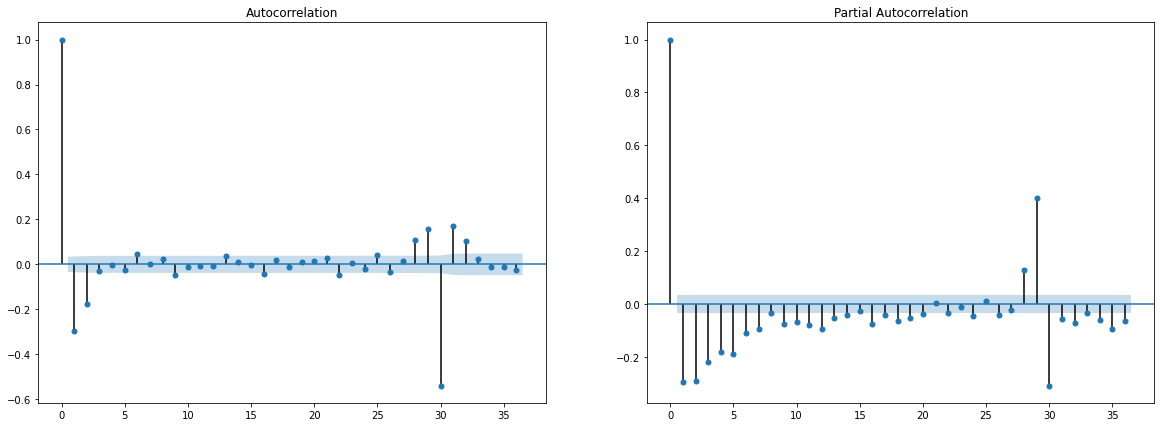

In [90]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(rainfall_log_2, lags = 36, ax=ax1)
plot_pacf(rainfall_log_2, lags = 36, ax=ax2)
plt.show()

In [91]:
model = sm.tsa.SARIMAX(rainfall_log,order=(0,1,1),seasonal_order=(0,1,1,12))
sarima=model.fit()
print(sarima.summary())

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)

  ' ignored when e.g. forecasting.', ValueWarning)

2022-08-21 07:05:58.082 WARNING py.warnings: /usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)

  ' ignored when e.g. forecasting.', ValueWarning)

2022-08-21 07:05:58.091 WARNING py.warnings: /usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_m

                                     SARIMAX Results                                      
Dep. Variable:                            MaxTemp   No. Observations:                 3344
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                2072.610
Date:                            Sun, 21 Aug 2022   AIC                          -4139.219
Time:                                    07:06:16   BIC                          -4120.886
Sample:                                         0   HQIC                         -4132.660
                                           - 3344                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7715      0.009    -84.325      0.000      -0.789      -0.754
ma.S.L12      -1.0000      0.695   

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)

  ValueWarning)

2022-08-21 07:06:46.347 WARNING py.warnings: /usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)



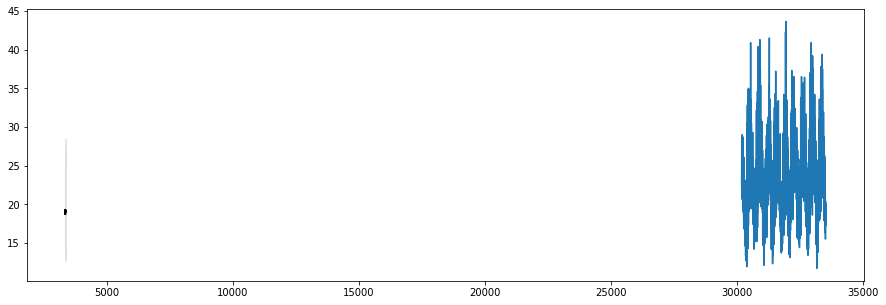

In [93]:
prediction = sarima.get_forecast(steps =30).summary_frame()  #Prédiction avec intervalle de confiance

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(dfts['MaxTemp'])
prediction = np.exp(prediction) #Passage à l'exponentielle

prediction['mean'].plot(ax = ax, style = 'k--') #Visualisation de la moyenne

ax.fill_between(prediction.index, prediction['mean_ci_lower'], prediction['mean_ci_upper'], color='k', alpha=0.1); #Visualisation de l'intervalle de confiance